**NAME : LIKITHA S**

**GITHUB LINK : https://github.com/LikithaSrinivas100/IDS-PYTHON**

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [295]:
# Load the csv file
df = pd.read_csv(r"C:\Users\likitha\Downloads\diabetes.csv")

In [423]:
# display the dataframe
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


In [425]:
# Information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Prediction                768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


**Exploratory Data Analysis (EDA)**

In [427]:
# Summary Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.295573
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.456597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [429]:
'''
# selecting the columns with null values and replacing 0 with nan
zero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)
'''

'\n# selecting the columns with null values and replacing 0 with nan\nzero_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]\ndf[zero_columns] = df[zero_columns].replace(0, np.nan)\n\n# Fill missing values with median\ndf.fillna(df.median(), inplace=True)\n'

In [431]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Prediction                  0
dtype: int64

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Prediction                768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


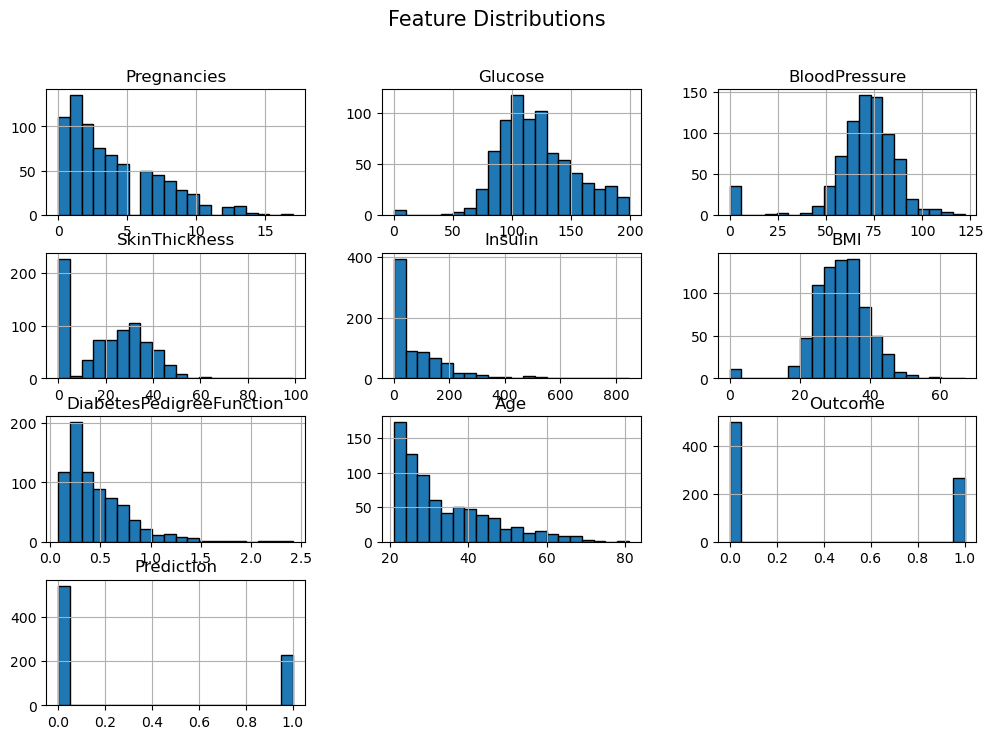

In [435]:
# Plot histograms for all numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

In [436]:
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.278099
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.700978
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.085572
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.082917
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.188667
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.392481
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.187126
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.399004
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.471681
Prediction,0.278099,0.700978,0.085572,0.082917,0.188667,0.392481,0.187126,0.399004,0.471681,1.000000


<Axes: >

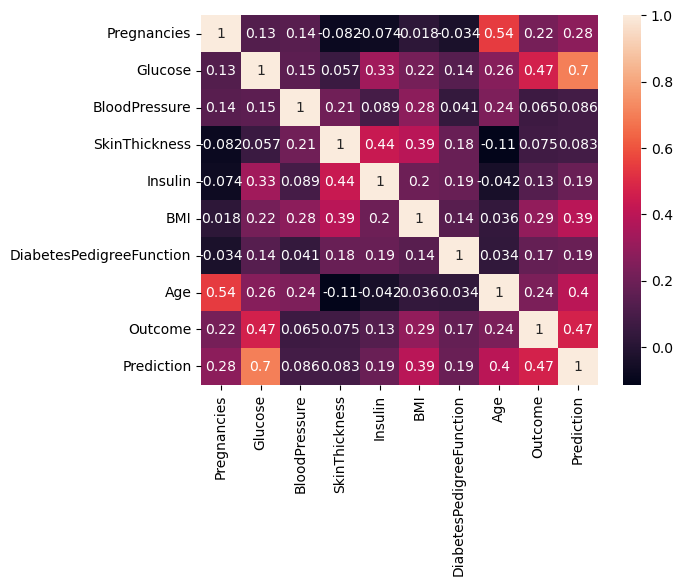

In [437]:
import seaborn as sns
sns.heatmap(df_corr,annot=True)

**Model Training & Evaluation**

In [438]:
# --- Splitting Data into Training (80%) and Testing (20%) ---
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [439]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [441]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [442]:
y_pred = model.predict(X_test)

In [443]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [446]:
y_pred1 = model.predict(X)

In [447]:
df['Prediction']=y_pred1

In [457]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132,1,1
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912,0,0
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594,1,1
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093,0,0
5,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230,0,0
...,...,...,...,...,...,...,...,...,...,...
763,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268,0,0
764,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184,0,0
765,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230,0,0
766,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178,1,0


**confusion matrix and classification report**

In [459]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)

In [461]:
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[98 25]
 [28 41]]


In [463]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7239583333333334


In [465]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall:.2f}")

Recall Score: 0.59


In [467]:
# Compute Precision and F1-score
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.6212
F1-Score: 0.6074


In [469]:
# Full Classification Report (also includes accuracy & recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.62      0.59      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



**FINAL CONCLUSION**

In [479]:
# Final Conclusion
print("Conclusion:")
print("The Logistic Regression model performed well in predicting diabetes using the PIMA Indians Diabetes dataset.")
print("Key findings:")
print(f"- Accuracy: {accuracy:.4f}, which indicates the model's overall correctness.")
print(f"- Precision: {precision:.4f}, meaning the proportion of actual diabetic cases identified correctly.")
print(f"- Recall: {recall:.4f}, shows ability to detect diabetes cases.")
print(f"- F1 Score: {f1:.4f}, which balances precision and recall.")
print("The confusion matrix shows correct and incorrect classifications, helping understand model performance.")

Conclusion:
The Logistic Regression model performed well in predicting diabetes using the PIMA Indians Diabetes dataset.
Key findings:
- Accuracy: 0.7240, which indicates the model's overall correctness.
- Precision: 0.6212, meaning the proportion of actual diabetic cases identified correctly.
- Recall: 0.5942, shows ability to detect diabetes cases.
- F1 Score: 0.6074, which balances precision and recall.
The confusion matrix shows correct and incorrect classifications, helping understand model performance.
